Biodiversity National Parks

In [200]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency

In [201]:
df_obs = pd.read_csv("observations.csv")
df_spc = pd.read_csv("species_info.csv")

In [202]:
df_obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


category - class of animal

scientific_name - the scientific name of each species

common_name - the common names of each species

conservation_status - each species’ current conservation status


In [203]:
df_spc.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


What is the distribution of conservation_status for animals?

  conservation_status  number
0           Risk Free    5633
1  Species of Concern     161
2          Endangered      16
3          Threatened      10
4         In Recovery       4


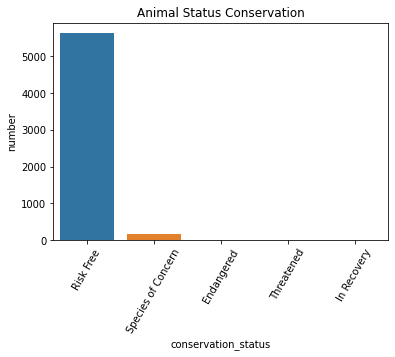

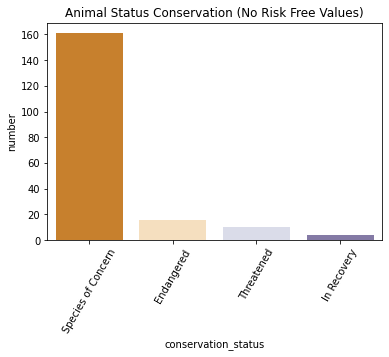

In [204]:
df_spc.conservation_status = df_spc.conservation_status.fillna("Risk Free")

conservation_status_count = df_spc.conservation_status.value_counts().reset_index()
conservation_status_count.columns = ["conservation_status", "number"]

print(conservation_status_count)

plt.clf()
sns.barplot(data = conservation_status_count, x = "conservation_status", y = "number")
plt.xticks(rotation = 60)
plt.title("Animal Status Conservation")
plt.show()

plt.clf()
sns.barplot(data = conservation_status_count[1:], x = "conservation_status", y = "number", palette= "PuOr")
plt.xticks(rotation = 60)
plt.title("Animal Status Conservation (No Risk Free Values)")
plt.show()

Are certain types of species more likely to be endangered?

    Mammal species tend to be more endangered than others

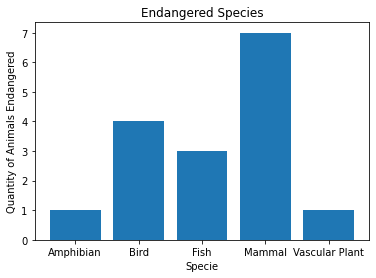

In [205]:
df_spc_endangered = df_spc[df_spc.conservation_status == "Endangered"].reset_index(drop = True)
df_spc_endangered = df_spc_endangered.groupby("category")
species_name = []
species_number = []

for specie, df in df_spc_endangered:
    species_name.append(specie)
    species_number.append(len(df))

plt.clf()
plt.bar(species_name, species_number)
plt.title("Endangered Species")
plt.xlabel("Specie")
plt.ylabel("Quantity of Animals Endangered")
plt.show()


Are the differences between species and their conservation status significant?

    Yes, some species in concern have bigger values tha others, for example Birds show a bigger quantity of species in concern

Text(0.5, 1.0, 'Category Species and their Status')

<Figure size 432x288 with 0 Axes>

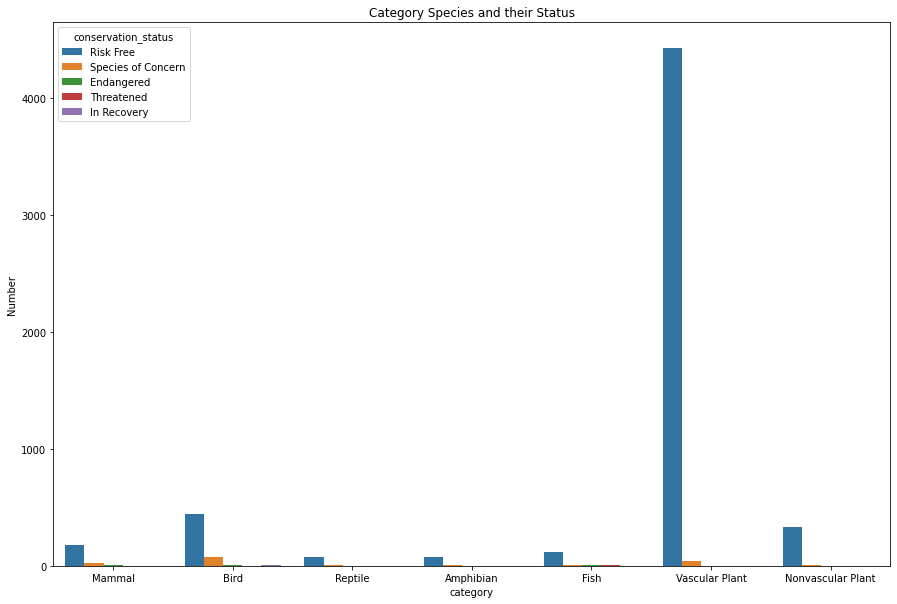

In [206]:
df_spc["Number"] = 1

plt.clf()
f, ax = plt.subplots(figsize = (15, 10))
sns.barplot(data = df_spc, x = "category", y = "Number", hue = "conservation_status", estimator = sum)
ax.set_title("Category Species and their Status")

In [207]:
number_values = []

def filtro(x):
    if x.conservation_status == "Risk Free":
        number_values.append(0)
    else:
        number_values.append(1)


df_spc.apply(filtro, axis = 1)

0       None
1       None
2       None
3       None
4       None
        ... 
5819    None
5820    None
5821    None
5822    None
5823    None
Length: 5824, dtype: object

<Figure size 432x288 with 0 Axes>

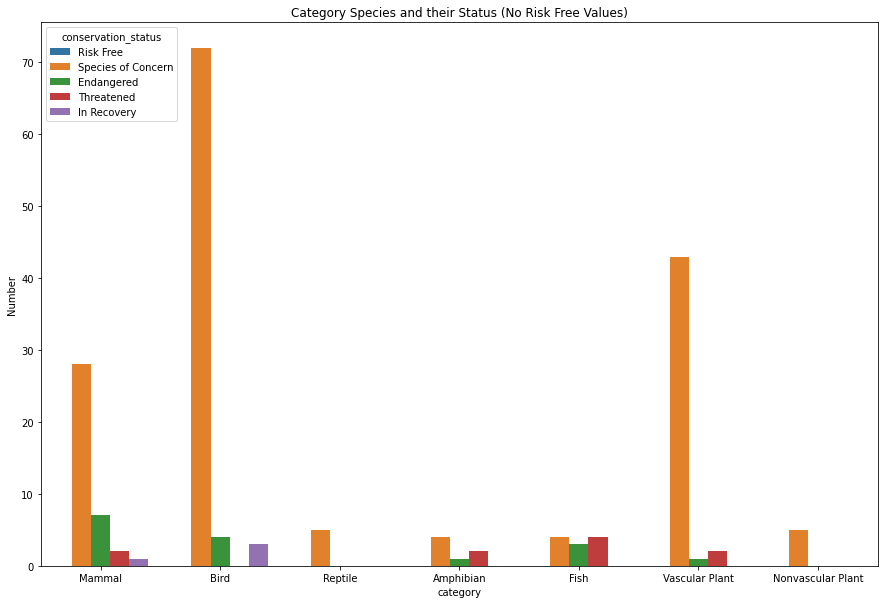

In [208]:
df_spc["Number"] = number_values

plt.clf()
f, ax = plt.subplots(figsize = (15, 10))
sns.barplot(data = df_spc, x = "category", y = "Number", hue = "conservation_status", estimator=sum)
ax.set_title("Category Species and their Status (No Risk Free Values)")
plt.show()


Which species were spotted the most at each park?


<Figure size 432x288 with 0 Axes>

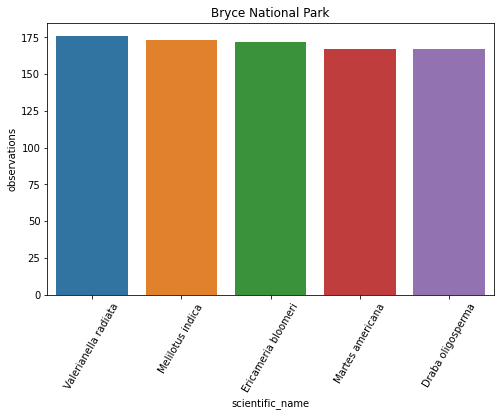

<Figure size 432x288 with 0 Axes>

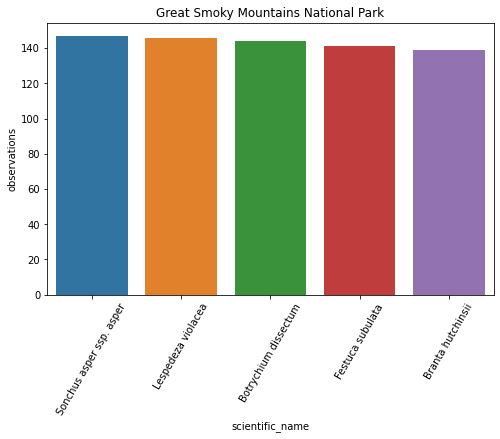

<Figure size 432x288 with 0 Axes>

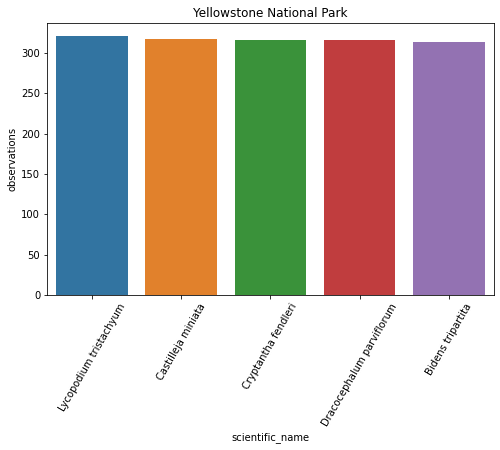

<Figure size 432x288 with 0 Axes>

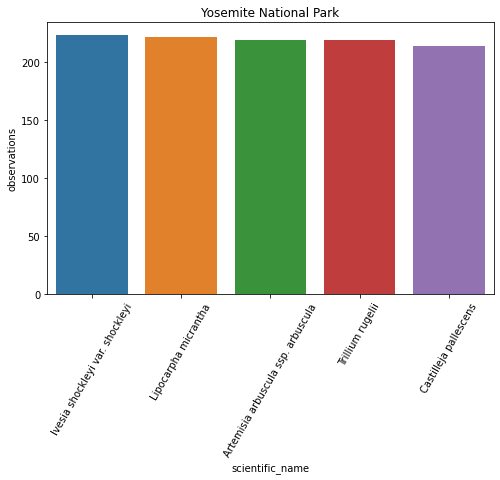

In [241]:
df_obs_group = df_obs.groupby("park_name")

for park, df in df_obs_group:
    plt.clf()
    f, ax = plt.subplots(figsize = (8, 5))
    df = df.sort_values(by = "observations", ascending = False)
    df = df[:5]
    ax = sns.barplot(data = df, x = "scientific_name", y = "observations")
    ax.set_title(park)
    plt.xticks(rotation = 60)
    plt.show()